# Gradiant Descent Models - Data Preparation

## 1.0 Setup


In [80]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# set random seed to ensure that results are repeatable
np.random.seed(1)

## 2.0 Load data 

In [81]:
gene_1 = np.round(np.random.uniform(0, 10, 50),2)
gene_2 = np.round(np.random.uniform(0, 10, 50),2)
present = np.random.choice([0, 1], 50)

In [82]:
data = {
    'Gene_1': gene_1,
    'Gene_2': gene_2,
    'Present': present
}

df = pd.DataFrame(data)
df.head(3)

,Gene_1,Gene_2,Present
0,4.17,0.19,0
1,7.20,6.79,0
2,0.00,2.12,0


## 3.0 Conduct initial exploration of the data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Gene_1   50 non-null     float64
 1   Gene_2   50 non-null     float64
 2   Present  50 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 1.1 KB


In [84]:
df.describe()

,Gene_1,Gene_2,Present
count,50.0000,50.000000,50.000000
mean,4.6692,5.047800,0.600000
std,3.0844,2.847123,0.494872
min,0.0000,0.030000,0.000000
25%,1.8900,2.670000,0.000000
50%,4.1800,5.550000,1.000000
75%,7.4100,6.985000,1.000000
max,9.8900,9.650000,1.000000


In [85]:
import summarytools
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Gene_1[float64],Mean (sd) : 4.7 (3.1)min < med < max:0.0 < 4.2 < 9.9IQR (CV) : 5.5 (1.5),47 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACrUlEQVR4nO3cu24aQRiG4X/AoOWgRQjF7mhSRkpByUXkYnMJKbgCijSp6JAQWssbI5aFNCFNJAMzLDvf6n1q72HEK6OZX7Y7nU4GxK5V9wsA13i69APOuZ6ZdT3vvz+dTu+e1wL/fBiqc643mUy+pWk69rn56+vr1jn3nVgR6tJv1G6apuP5fP4+Go12t9w4y7JksViMN5tN18wIFUEufvWbmY1Go93z8/Nvj/v3PK4B/sNmChIIFRIIFRIIFRIIFRIIFRKuOp7yVZZlx8xS55zvLWqbbDGRi0tloeZ53imK4ut0Om232+2bhgVndU22mMjFp7JQ9/v9U5Ik/dlstnt5edneen3Nky0mcpGp9KvfzGwwGPhOtcxqnmwxkYsHmylIIFRIIFRIIFRIIFRIqHzXHyJwYCB56B44aDALWPcdnt0ys6PntR++d7Shhg4MFA/dQwcNZv7rDn12WZadPM8/D4fDX61Wq7j1+kvvHW2oIQMD4UN370GDWfC6g569Wq3Gy+Xy02w2+1nF5xVtqGcBAwPZQ/eAQYNZ4Lp9n73dbntm1X1ebKYggVAhgVAhgVAhgVAhgVAhIfrjKV+BU630eDx27vxKDxGw7qjX3MhQQ6daRVEkZVl+2e12P8zM9zzz4ULWHfuaGxlq6J/B/J2y9A+HQ7uK96tKyLpjX3MjQz3znZKcpyyqfNYd+5rZTEECoUICoUICoUICoUJCo3f9dWnqoXudCPXOmnzoXidCvbMmH7rXiVAr0sRD9zqxmYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEq/5TSpZlya03fnt7S8zM8jxP1ut1/5HXqz5b9b1Dr7+mrz/i9LOp0DkkcAAAAABJRU5ErkJggg=="">",0(0.0%)
2,Gene_2[float64],Mean (sd) : 5.0 (2.8)min < med < max:0.0 < 5.6 < 9.7IQR (CV) : 4.3 (1.8),46 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACnElEQVR4nO3dvY7aQBSG4TOwrMyPjBAKdDQpI6VwyUXkYnMJKbgCijSp6JAQAuEswhhSJClS7IJnTHY+631aNIuLV0hzfKR11+vVgNi13vsBgHs8vfcDoDmcc10ze/Y8frpery+vfUioqIVzrjsej7+kaTryOb/f77fOua+vxUqoqMtzmqaj+Xz+MhwOj1UO7na7ZLFYjDabzbOZESoebzgcHieTyU+Po923PuQyBQmECgmECgmECgmECgnc+iMTODQ3uzE4V0WoEQkdmpvdHpyrItS4eA/Nze4bnKsi1AgFDM3NbgzOVXGZggRChQRChQRChYSHXqaUZ4KBz94ys4vHufRyuXQ8v9PMzMqy7JhZ6pzzOR7tDPZhoSrPBEOevSzLTp7nHweDwY9Wq1VUOVsURVKW5afj8fjNzCrf+vM87xRF8Xk2m7Xb7Xbl8VbMM9hH/qIqzwS9n321Wo2Wy+WHLMu+T6fTrcfZ3vl8bld73N9Op9NTkiS9LMuOVb879hnsw+eoyjNBn2ffbrddM7N+v+99NpTPd/8R7QyWyxQkECokECokECokECokECokECokECokECokECokECokECokECok3NyeClggZgkYtXkz1JAFYpaAUadbv6ihC8QsAaMWdy1OhywQh2riEjCq4zIFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCY39ryiBu6zBu7SoVyNDDd1lDd2lRf0aGWrILqtZ+C4t6tfIUP/y3WWta5cW9eEyBQmECgmECgmECgmECgmNvvWjmphfkhAqzCz+lySECjOL/yUJoeIfsb4k4TIFCYQKCYQKCYQKCXddpna7XVL1Dx8Oh8TMLM/zZL1e9/7nedXvVn3u0PP39PULwdup0uiLC9YAAAAASUVORK5CYII="">",0(0.0%)
3,Present[int32],1. 12. 0,30 (60.0%)20 (40.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8qNh9FAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABMUlEQVR4nO3bwWnDQBRF0T9BmHgzgxC4GBWRYlPEdCOEZhEbbyaL9PB+4N1Twbe5CGz0ypwzAIUSEfeIuGUfYuY953xmH6G2bNv2VWtdsw9xMsY4SynfbsEttdZ13/dna+2VfYyD67o+e+/rcRy3iPCKLSKitfZ6PB4/2ccYuWcfkOEj+wD4IDbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQWaJ+HuhL/sQF87f9TLGOHvva5i+0JdhjHFGxDv7DjUGLzksBy+FKR9UnJ9slk+XTLZTPtc5XSbLKZ/znC6T85SPX99i/KkLGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2Qsp3xun/e/sJ3yuc7pMjF4gcwvCltq33xJpBkAAAAASUVORK5CYII="">",0(0.0%)


<AxesSubplot:xlabel='Gene_1', ylabel='Gene_2'>

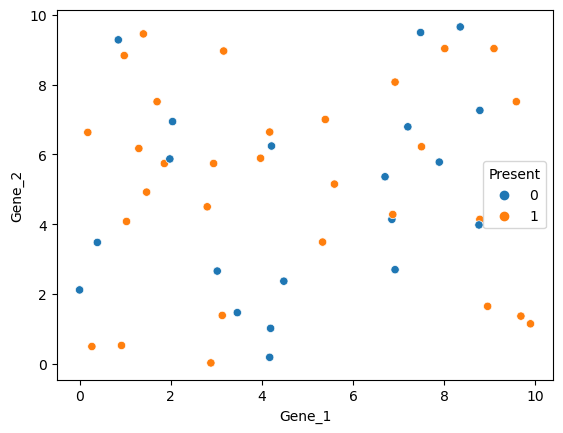

In [86]:
import seaborn as sns
sns.scatterplot(x=df['Gene_1'],y=df['Gene_2'],hue = df['Present'])

## Split data

In [87]:
X = df.drop('Present', axis=1)
y = df['Present']

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test  = train_test_split(X,y, test_size=0.3, random_state= 42)

#### Standardize numeric values

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test) 

In [90]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})


## Model 

In [91]:
from sklearn.neighbors import KNeighborsClassifier
Knn_model = KNeighborsClassifier()
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
model_preds = Knn_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Knn_basic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,model,Accuracy,Precision,Recall,F1
0,Knn_basic,0.333333,0.428571,0.333333,0.375


## KNN Grid Search

In [93]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'n_neighbors': [5],
    'weights': ['distance'],
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = knn, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)
print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best accuracy score is 0.6285714285714286
... with parameters: {'weights': 'uniform', 'n_neighbors': 10}


In [94]:
model_preds = grid_search.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Knn_Grid_search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,Knn_basic,0.333333,0.428571,0.333333,0.375000
0,Knn_Grid_search,0.400000,0.500000,0.444444,0.470588


## Knn Random search

In [95]:
score_measure = "accuracy"
kfolds = 5

param_grid = {
    'n_neighbors': [10],
    'weights': ['uniform'],
}

knn = KNeighborsClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=100,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = rand_search.fit(X_train, y_train)
print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_


Fitting 5 folds for each of 1 candidates, totalling 5 fits
The best accuracy score is 0.6285714285714286
... with parameters: {'weights': 'uniform', 'n_neighbors': 10}


c:\Users\mukes\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [96]:

model_preds = rand_search.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Knn_random_search", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

c:\Users\mukes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,model,Accuracy,Precision,Recall,F1
0,Knn_basic,0.333333,0.428571,0.333333,0.375000
0,Knn_Grid_search,0.400000,0.500000,0.444444,0.470588
0,Knn_random_search,0.400000,0.500000,0.333333,0.400000
